In [9]:
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina") # retina 설정

plt.style.use("seaborn-whitegrid") # 스타일 지정

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
raw = pd.read_csv('/content/drive/MyDrive/하영/캐글데이터로데이터분석하기/kaggle_survey_2020_responses.csv')
question = raw.iloc[0]
answer = raw.drop([0]) # 0번째를 제외하고 나머지

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order, palette="Blues_r"
                ).set_title(question[qno])

In [13]:
def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0].split("-")[0]
    return q_no

def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
  answer_count = answer_count.sort_values(by="count", ascending=False)
  return answer_count

def show_multiple_choice_bar_plot_by_qno(qno):
  multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)

  plt.figure(figsize=(10,6))
  sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index, 
              x="count", palette="Blues_r"
              ).set_title(get_question_title_by_qno(qno))

In [14]:
def show_plot_by_qno(qno):
  if qno in question.index: # 컬럼명에 확실히 qno가 있느냐
    show_countplot_by_qno(qno)
  else:
    show_multiple_choice_bar_plot_by_qno(qno)

# Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

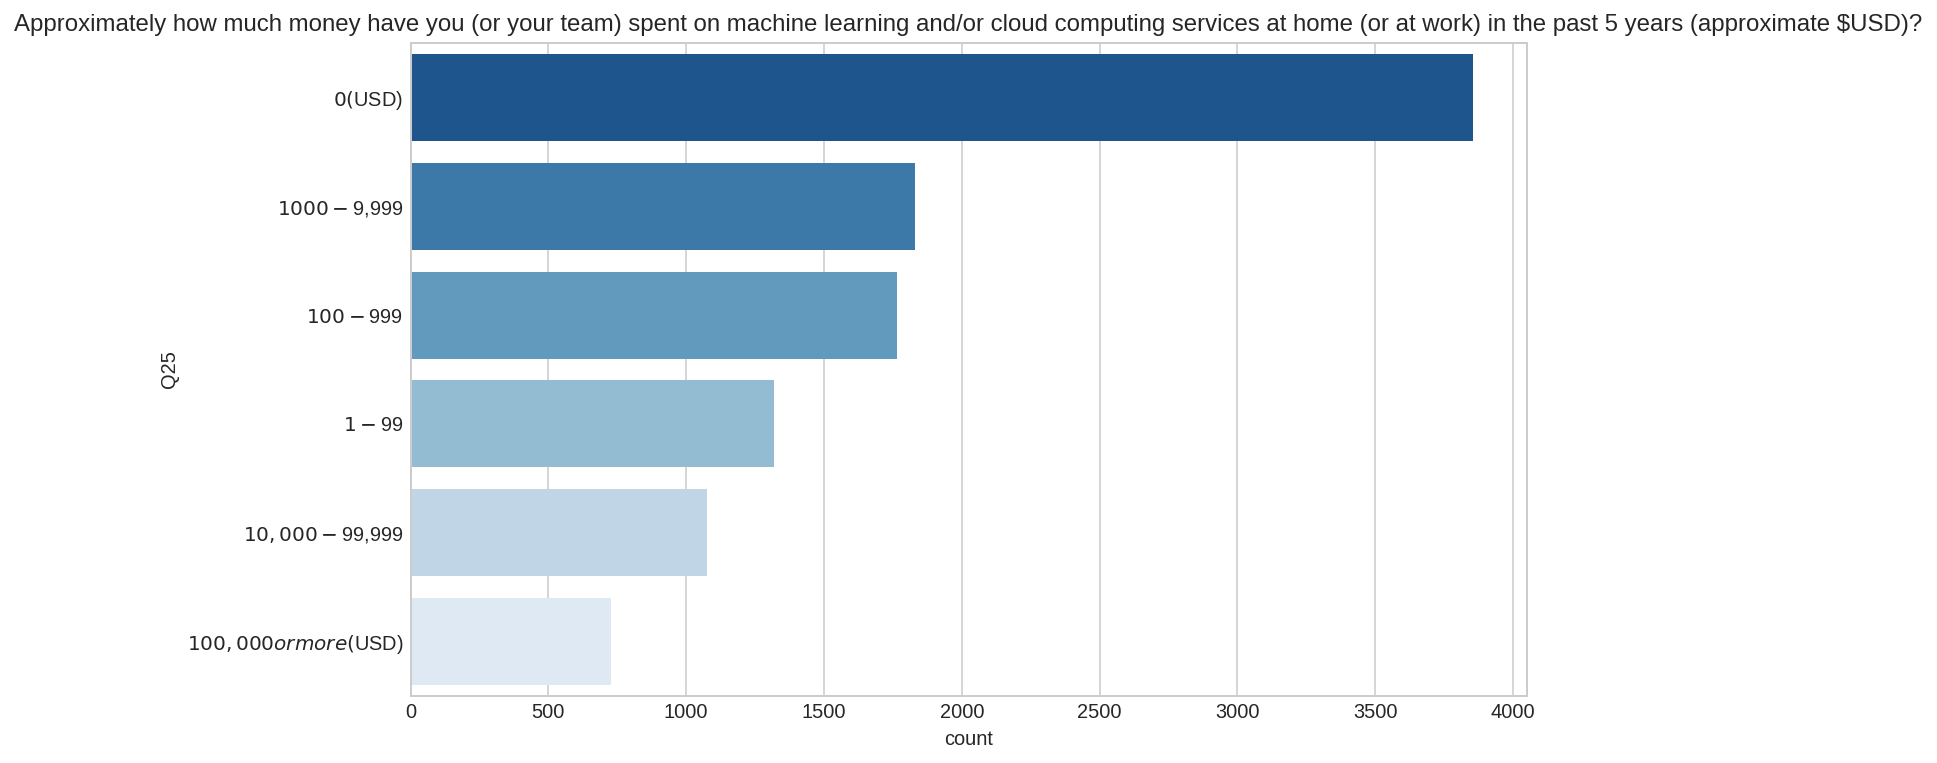

In [15]:
# 팀이나 개인적으로 머신러닝이나 클라우드 컴퓨팅에 지난 5년간 돈을 얼마 썼는지
show_plot_by_qno("Q25")

# Q26_A Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

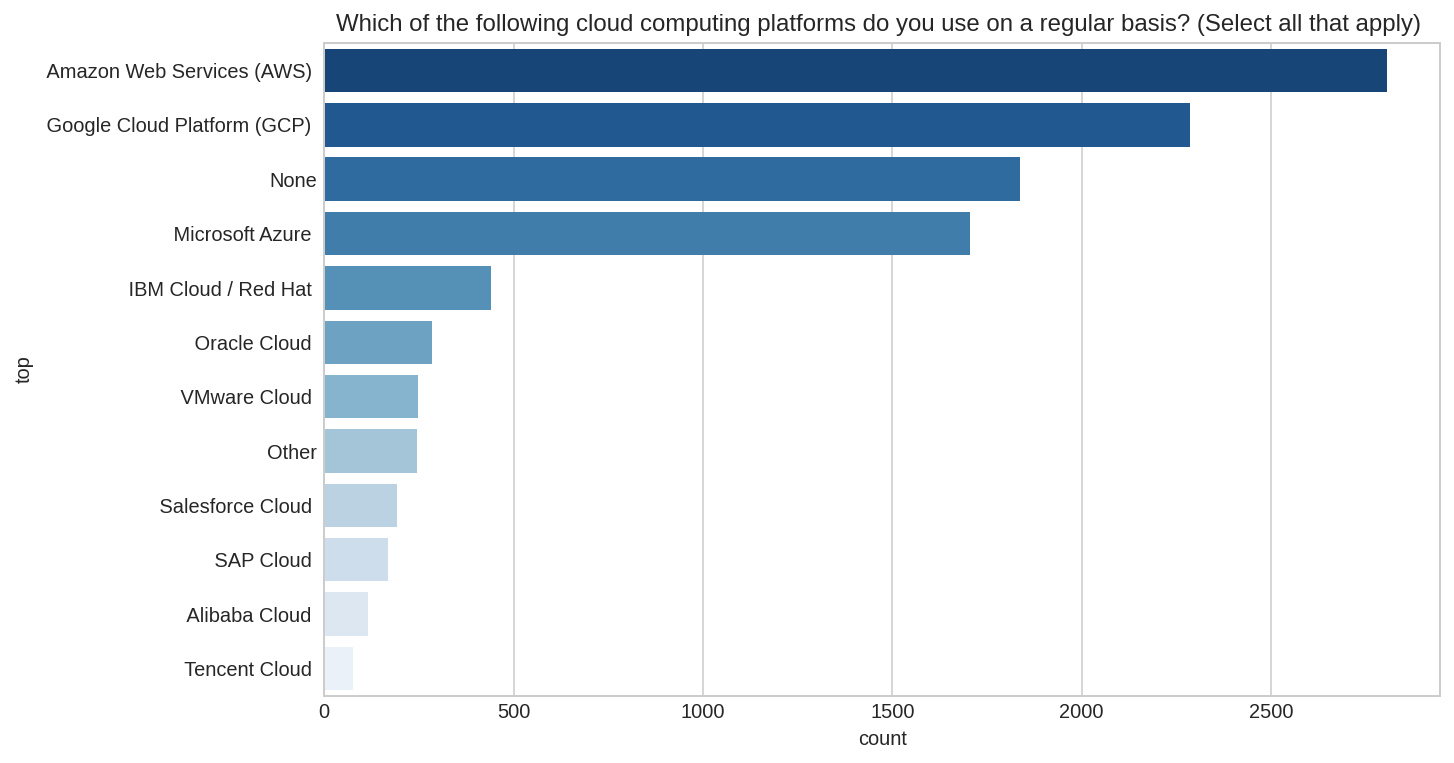

In [16]:
# 2개의 질문의 응답값을 가져옴
# 어떤 플랫폼을 사용하는지
show_plot_by_qno("Q26_A")

# Q26_B Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

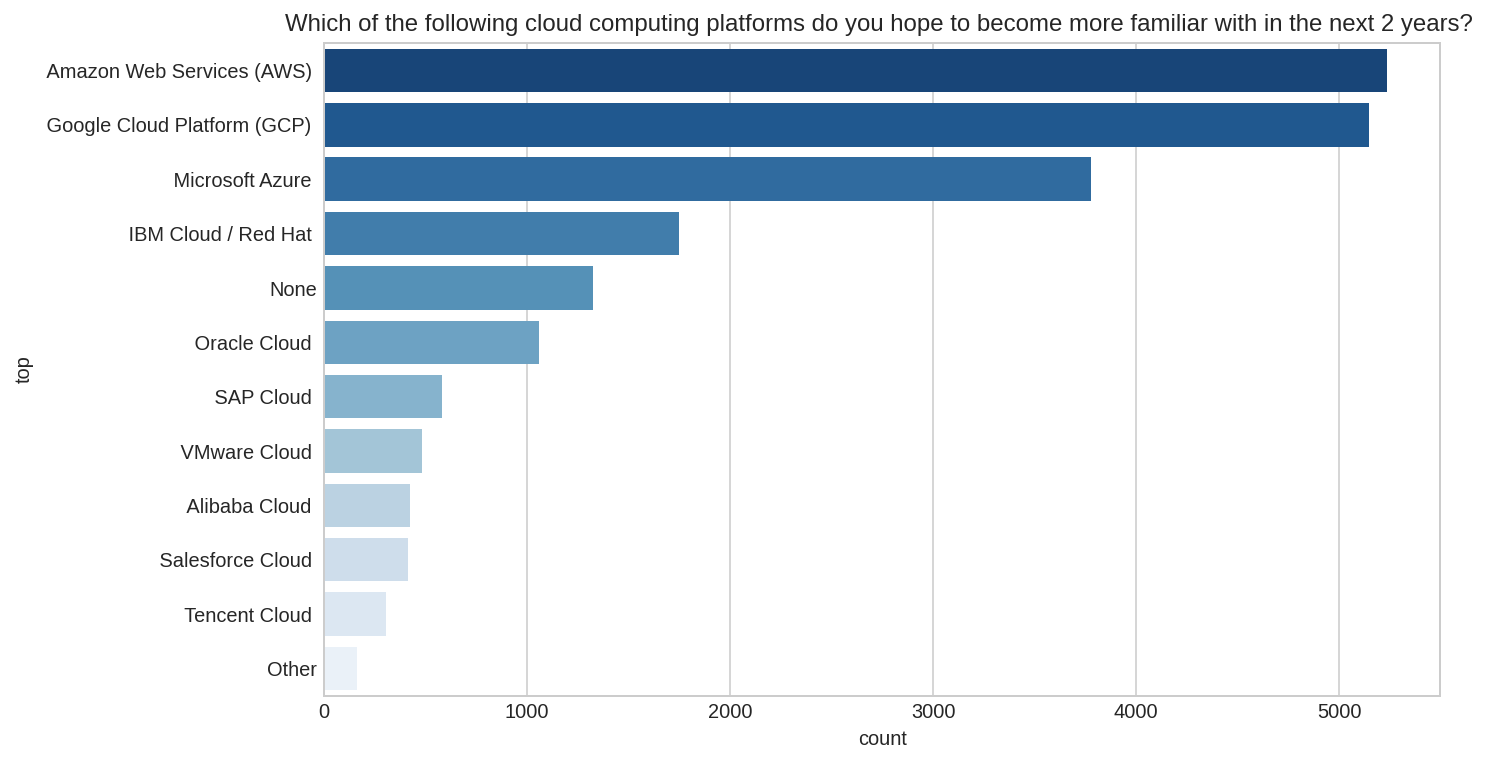

In [17]:
# 앞으로는 어떤 플랫폼을 사용할거냐
show_plot_by_qno("Q26_B")

# Q27_A Do you use any of the following cloud computing products on a regular basis? (Select all that apply)

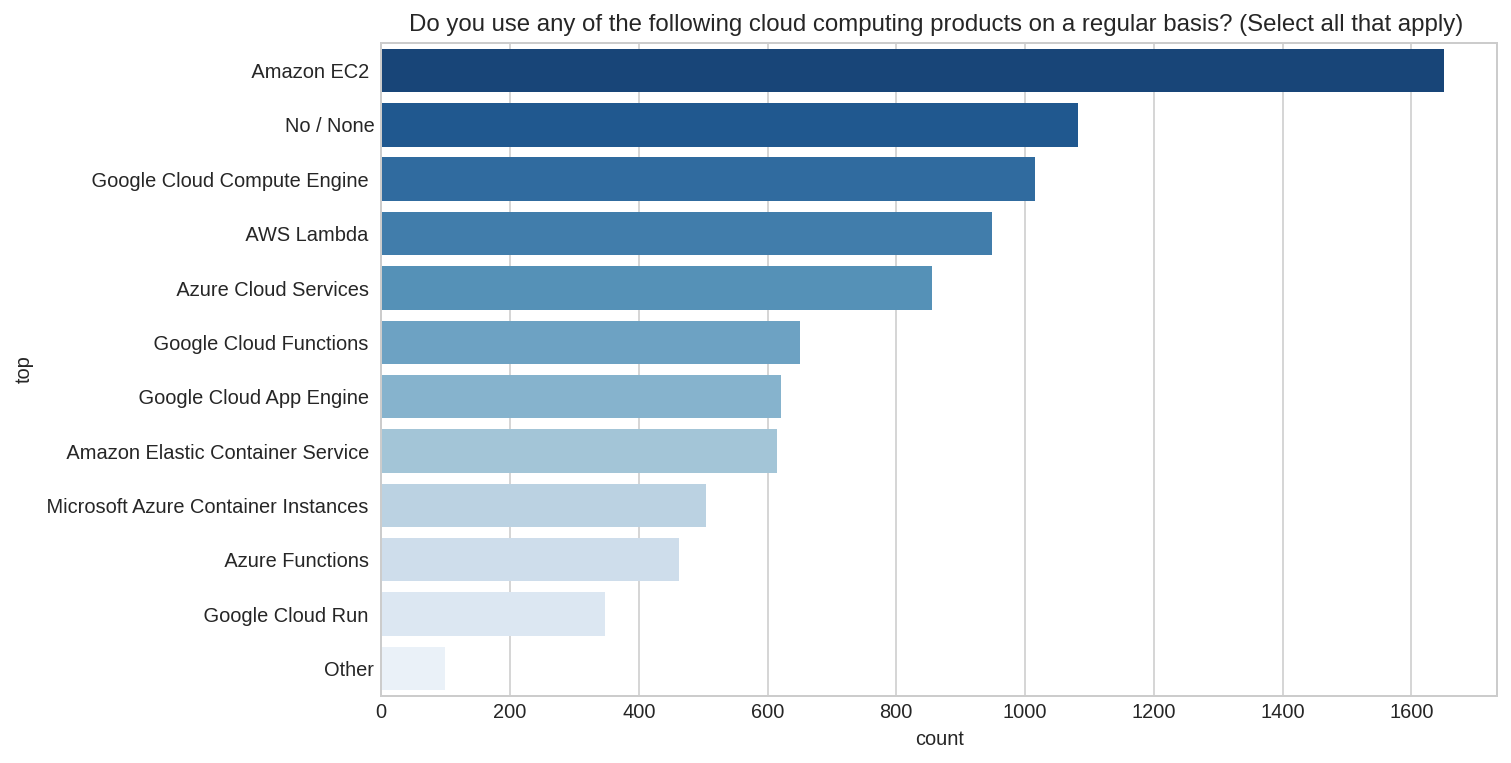

In [18]:
# 클라우드 컴퓨팅 제품 중에 어떤 제품군을 사용하고 있는지
show_plot_by_qno("Q27_A")

# Q27_B In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)

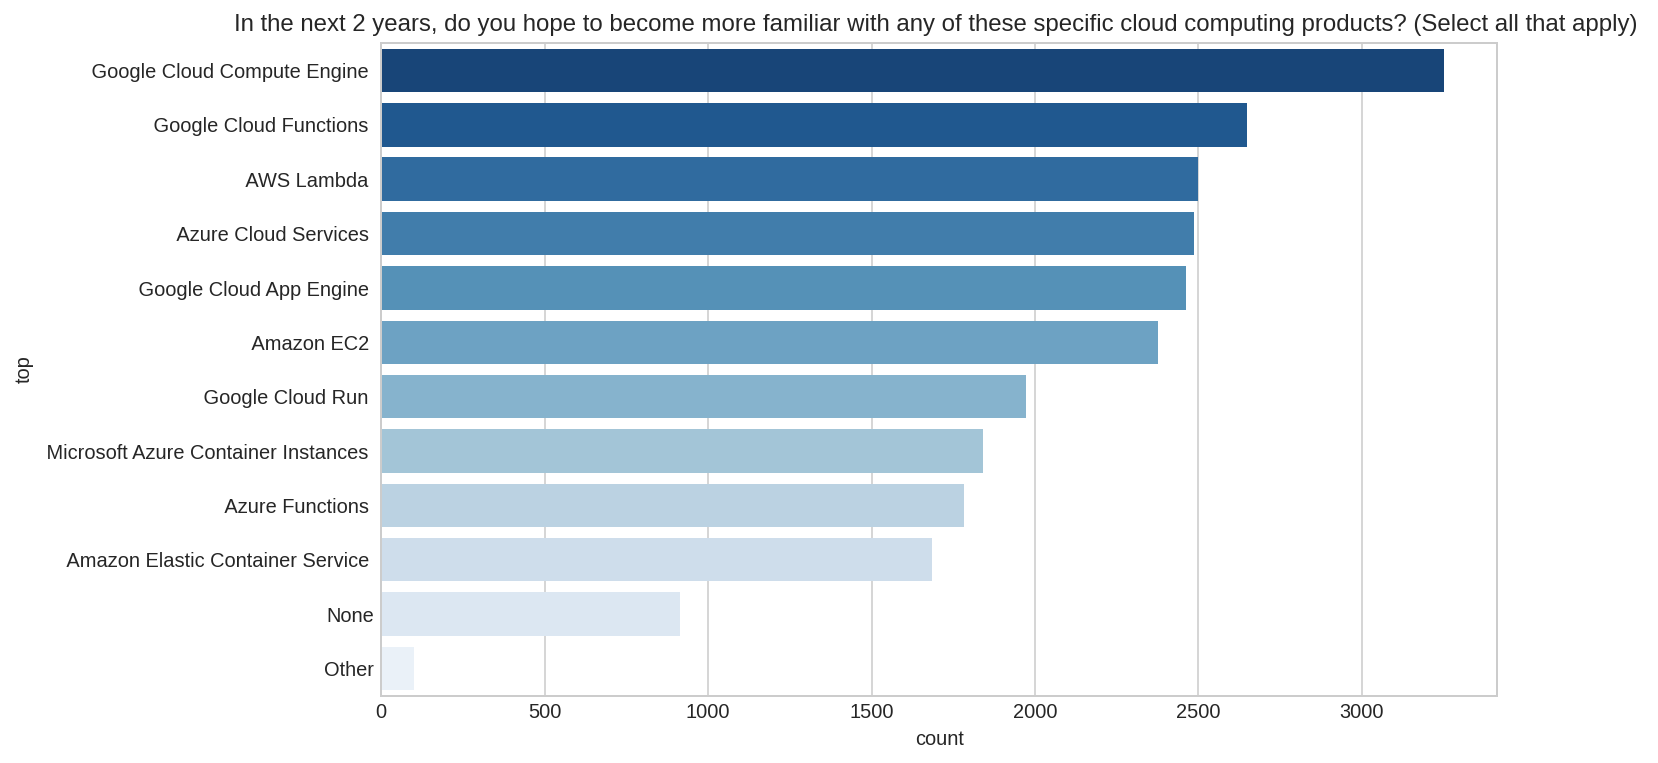

In [19]:
# 앞으로는 그럼 어떤걸 사용할 건지
show_plot_by_qno("Q27_B")

# Q28_A Do you use any of the following machine learning products on a regular basis? (Select all that apply)

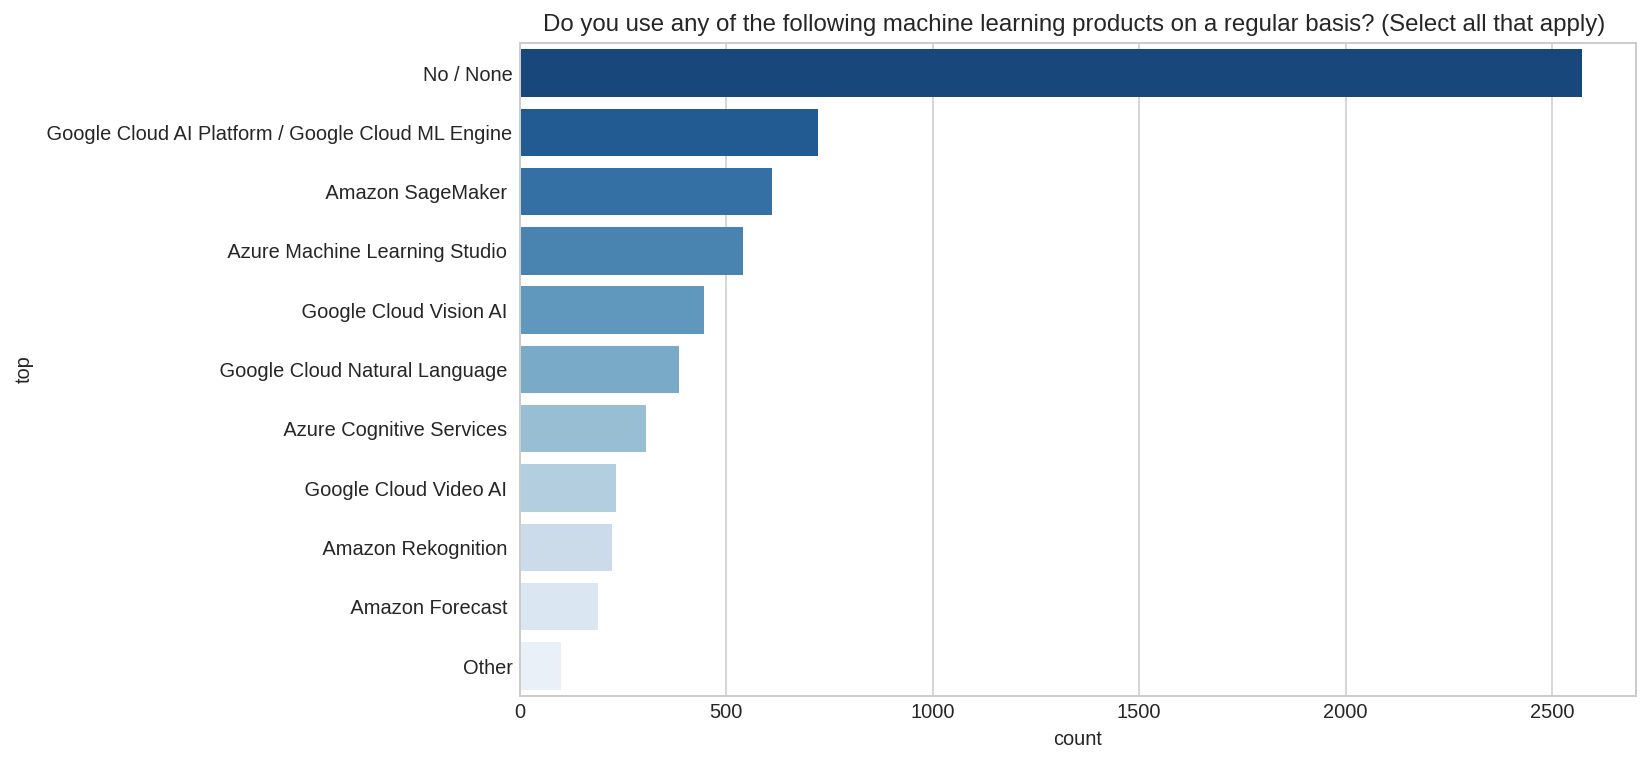

In [20]:
# 어떤 머신러닝 프로덕트를 사용하냐
show_plot_by_qno("Q28_A")

# Q28_B In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply)

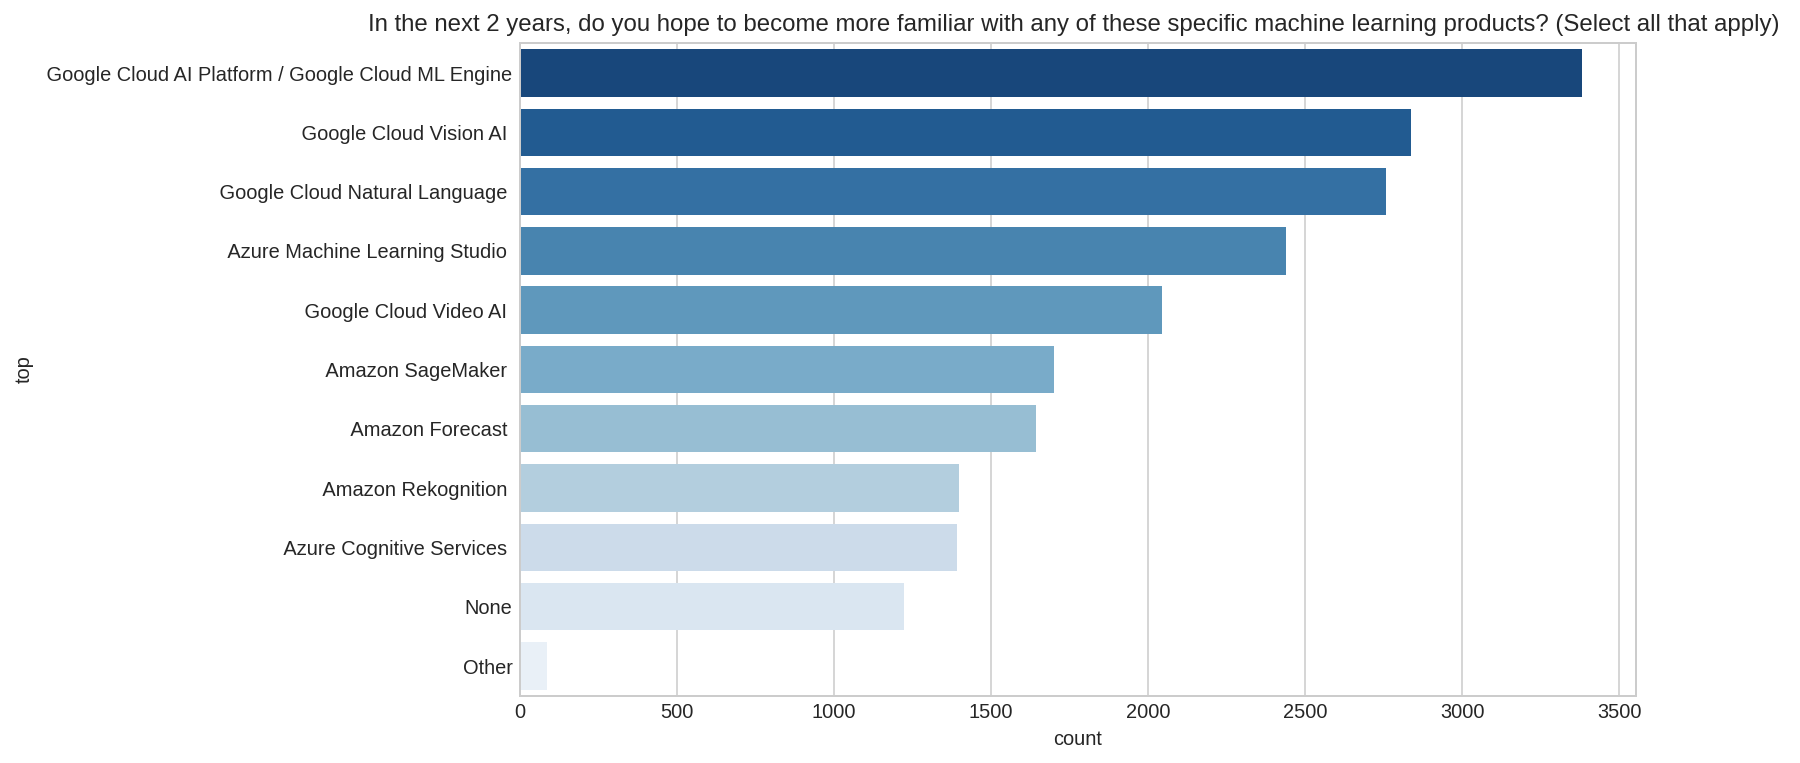

In [21]:
# 앞으로는 어떤걸 사용할건지
show_plot_by_qno("Q28_B")

# Q29_A Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)

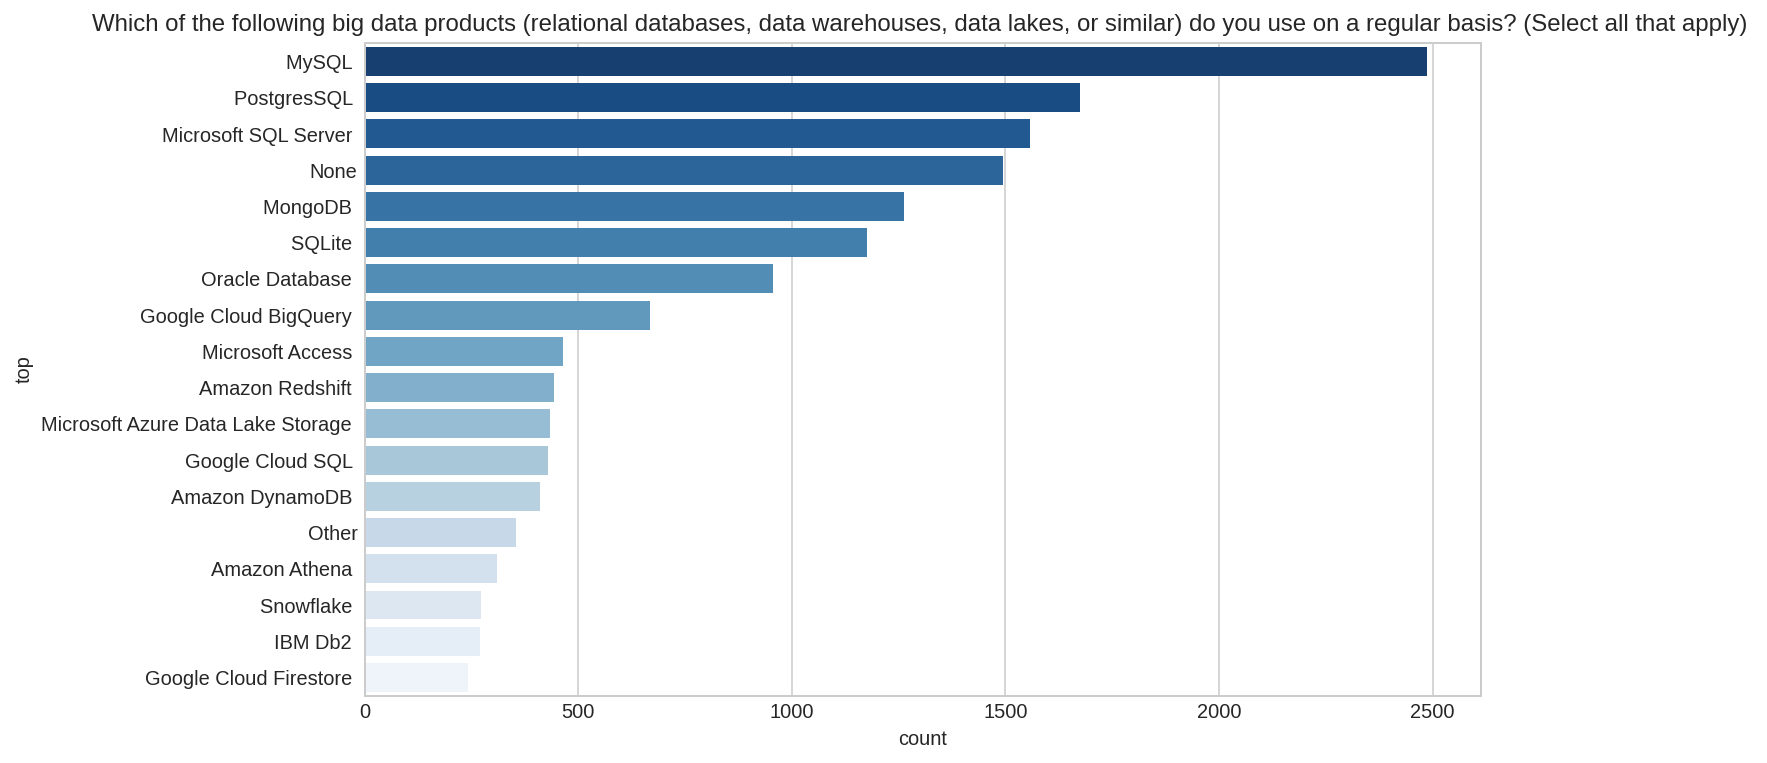

In [22]:
# 빅데이터 제품 중 어떤 제품을 사용하는지
show_plot_by_qno("Q29_A")

# Q29_B Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)

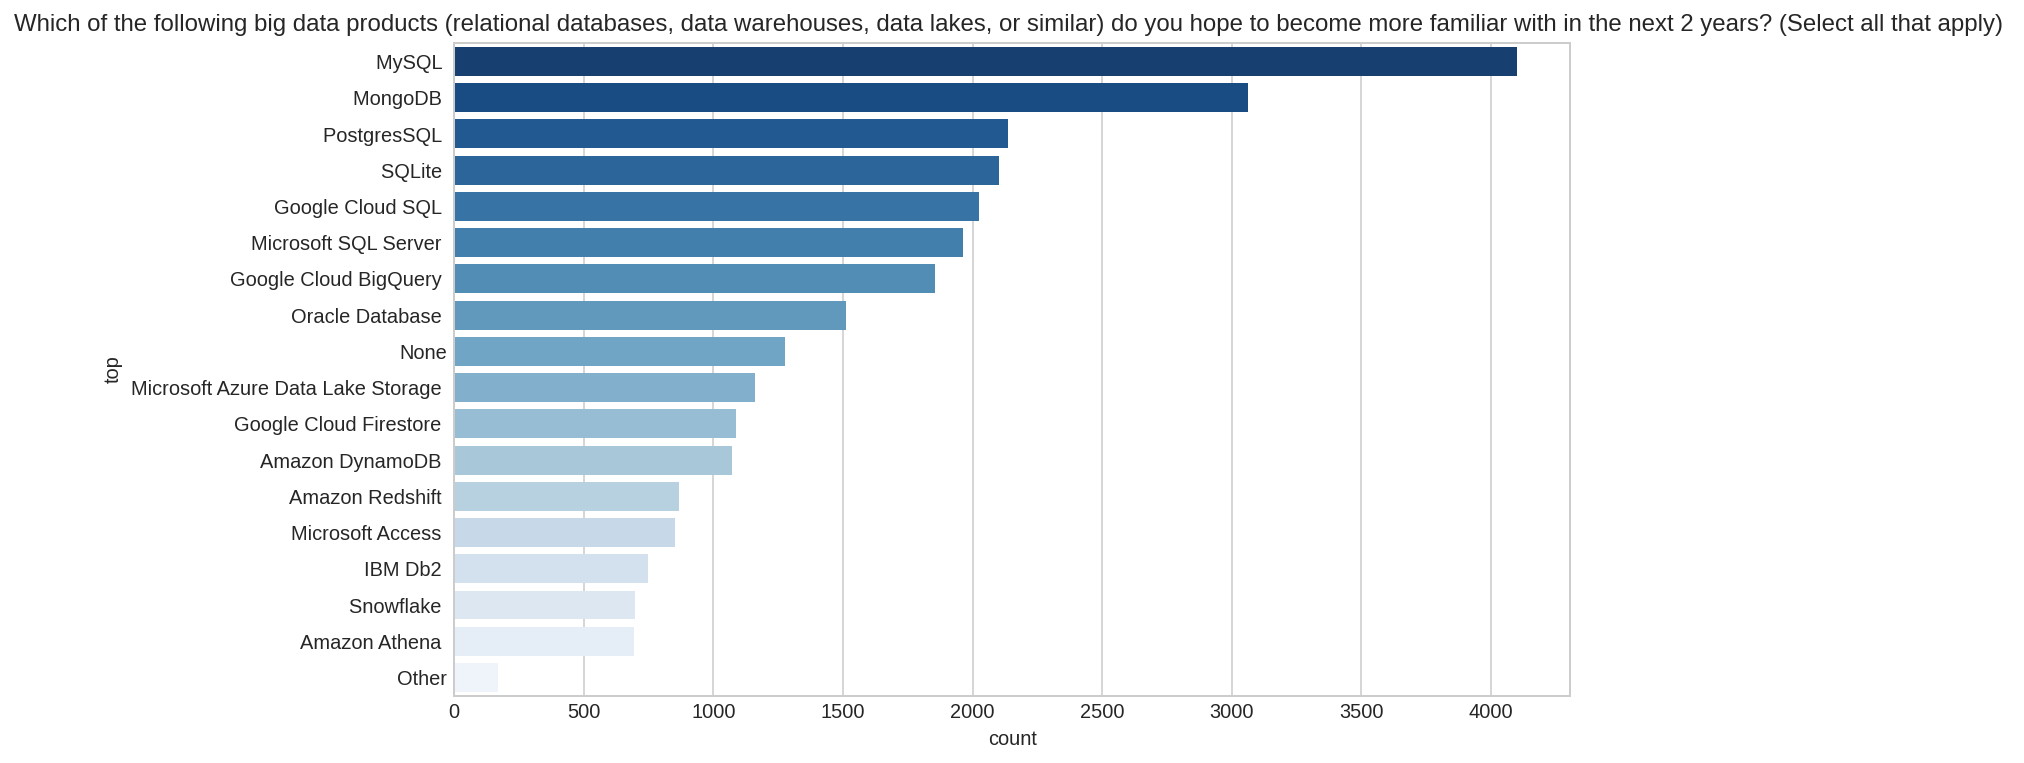

In [23]:
# 그럼 앞으로 어떤걸 사용할건지
show_plot_by_qno("Q29_B")

# Q30 Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?

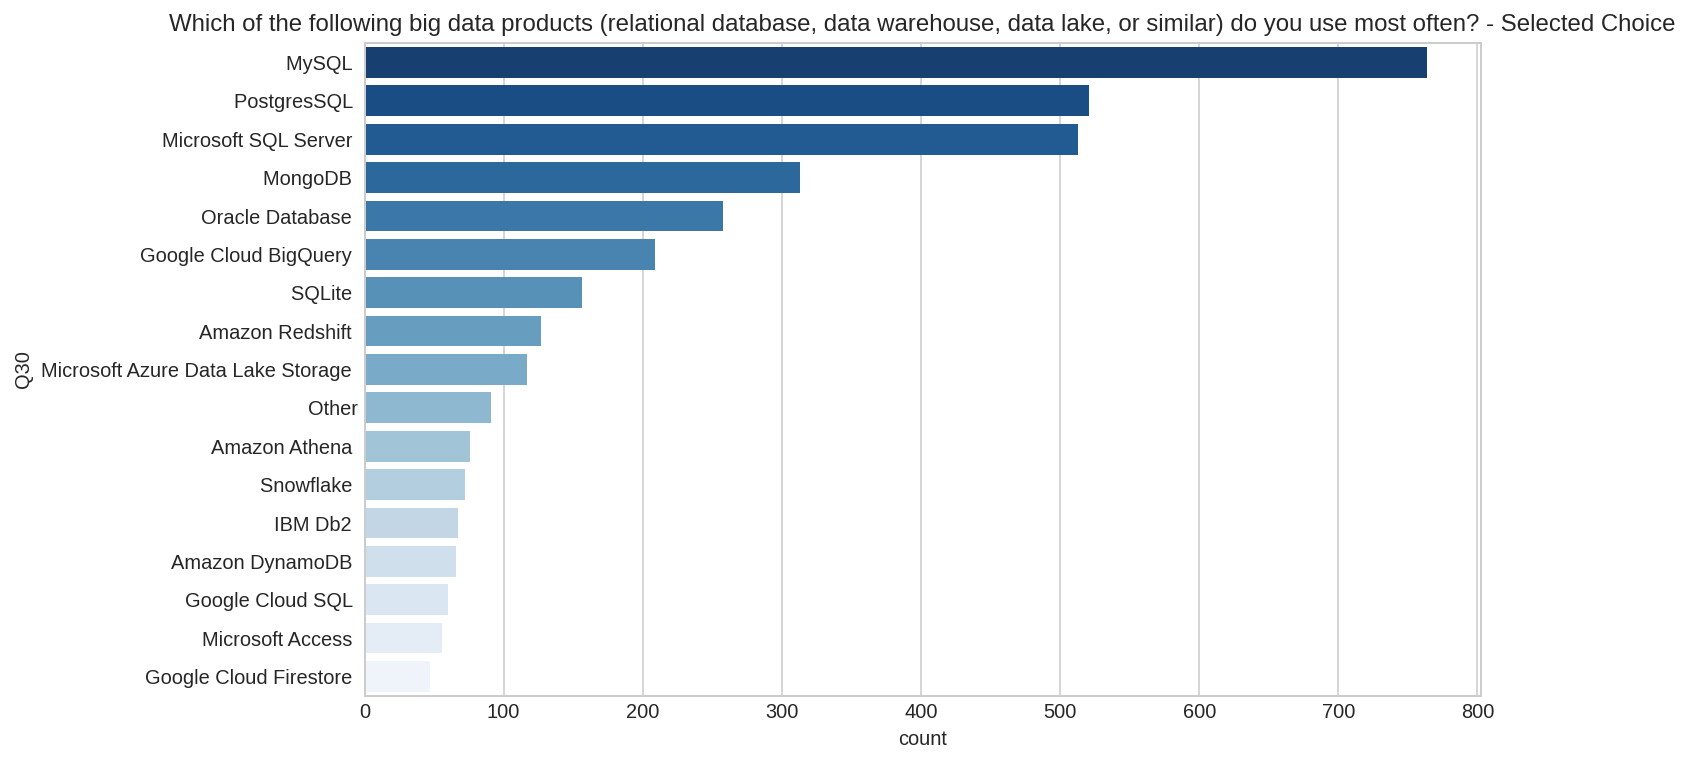

In [24]:
# 빅데이터 프로덕트로 가장 자주 사용하는게 어떤 건지(1개만 초이스)
show_plot_by_qno("Q30")

# Q31_A Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)

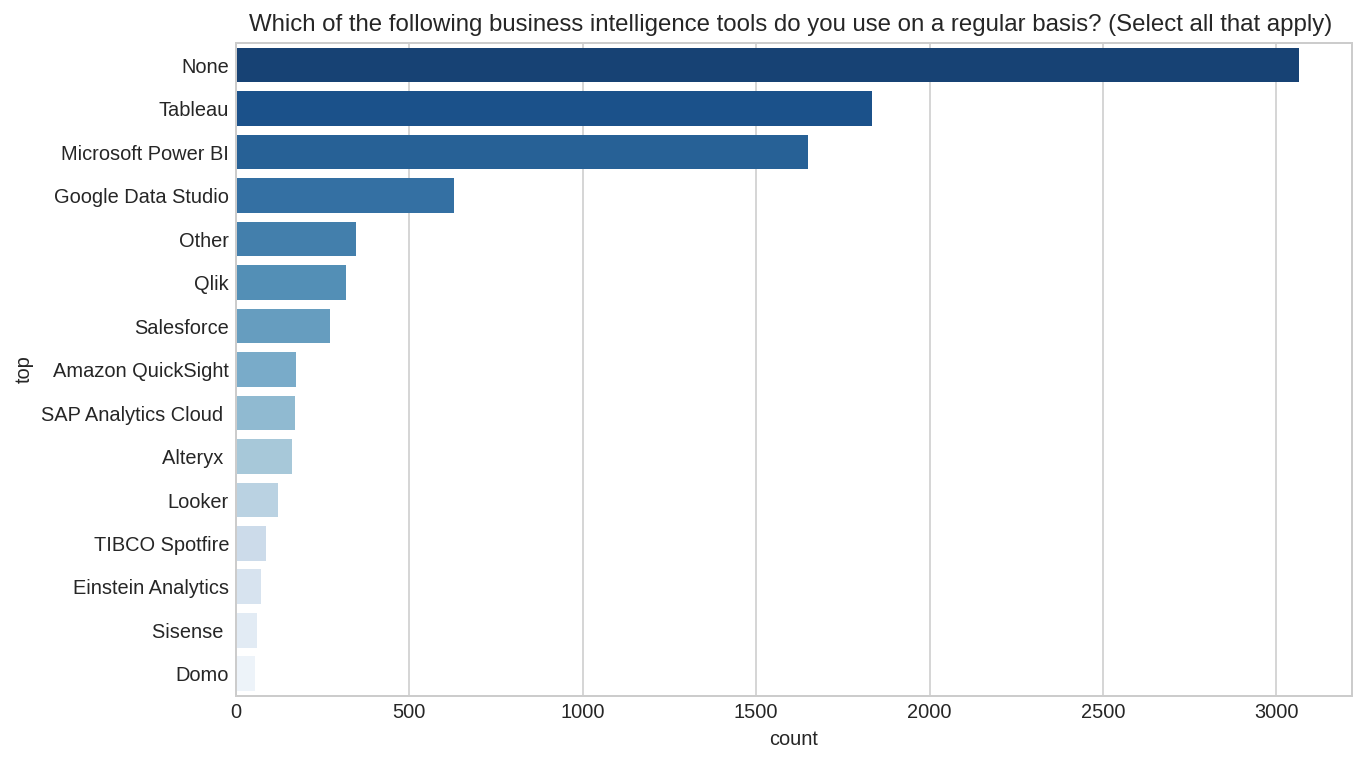

In [25]:
# 어떤 비즈니스 툴 사용하고 있는지(유료 툴)
show_plot_by_qno("Q31_A")

# Q31_B Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)

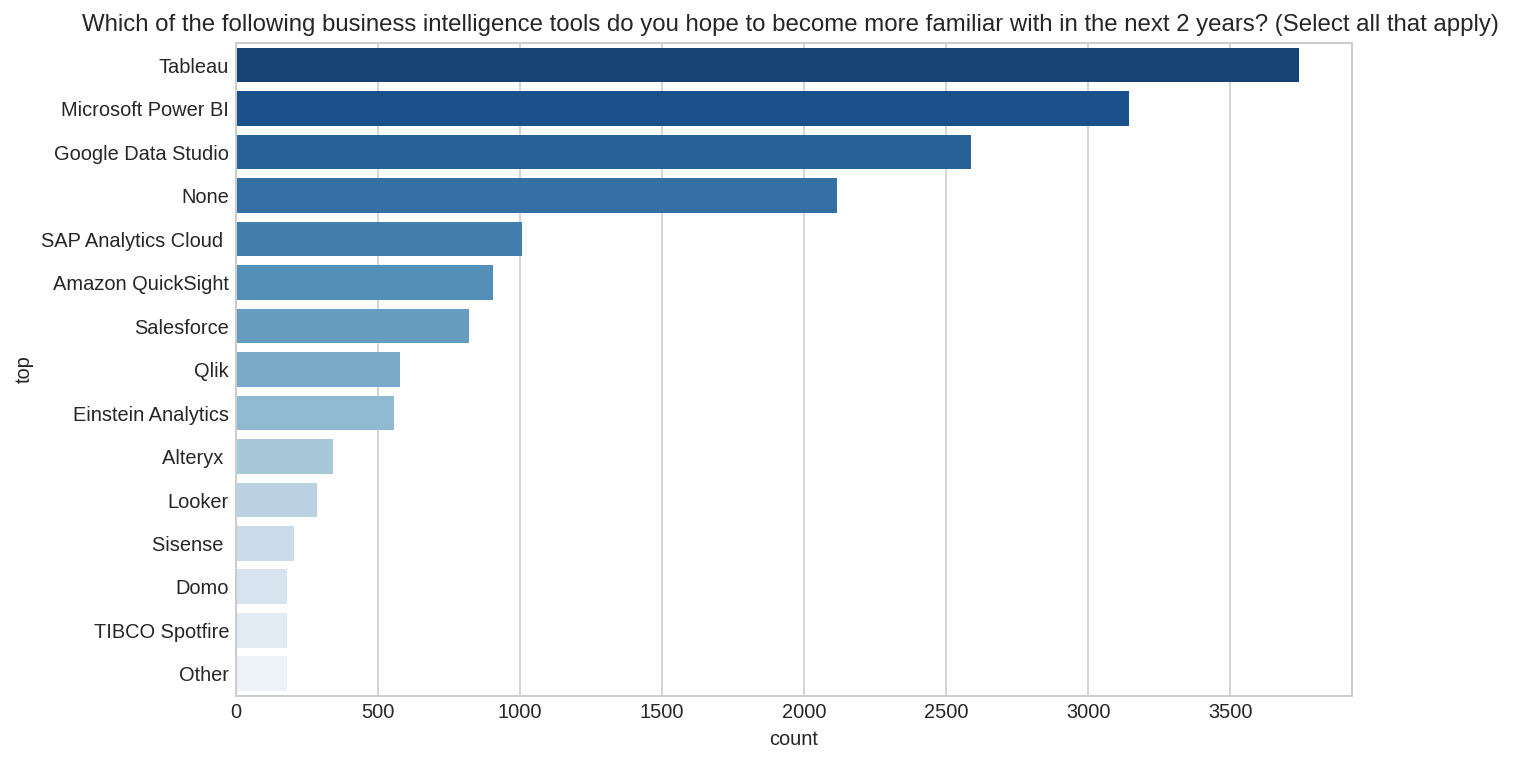

In [26]:
# 이후에 어떤 걸 사용하고자 하는지
show_plot_by_qno("Q31_B")

# Q32 Which of the following business intelligence tools do you use most often?

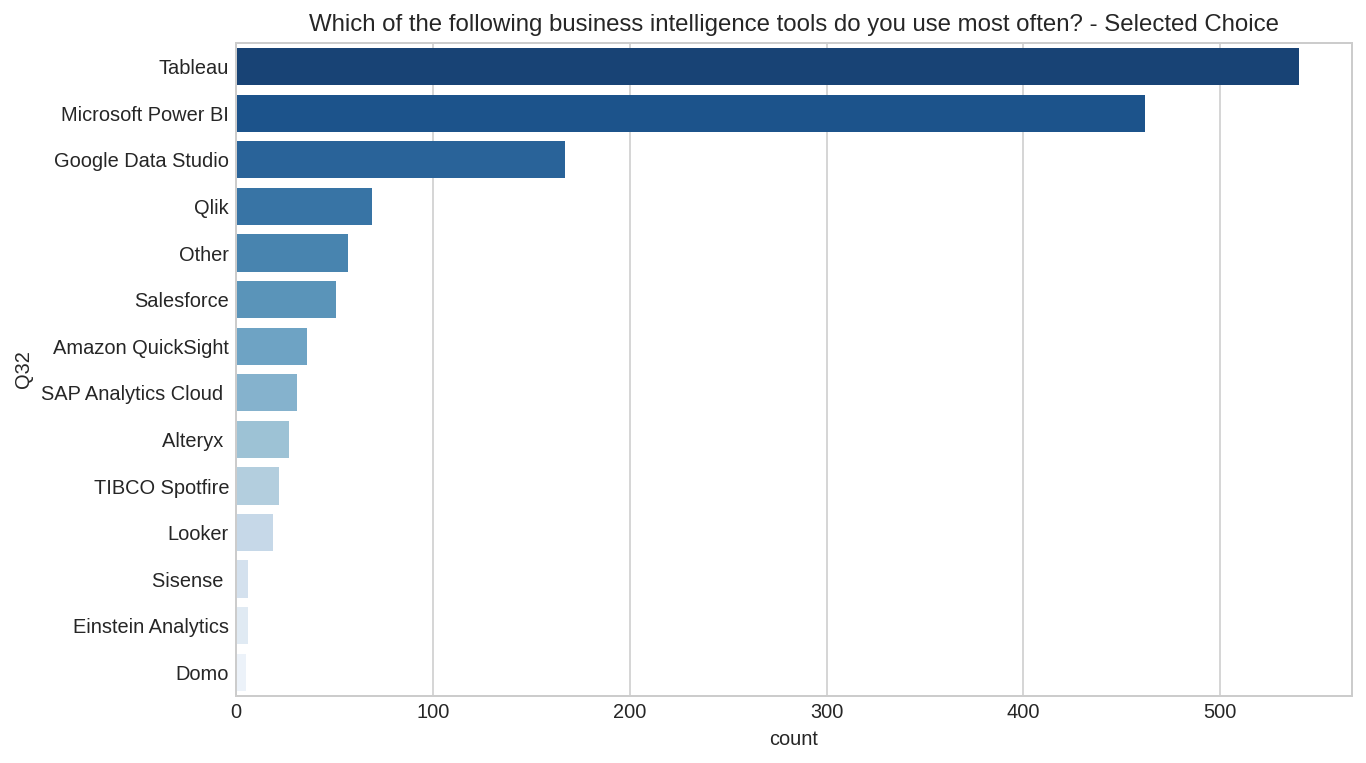

In [27]:
# 가장 자주 사용하는 툴이 어떤 건지
show_plot_by_qno("Q32")

# Q33_A Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)

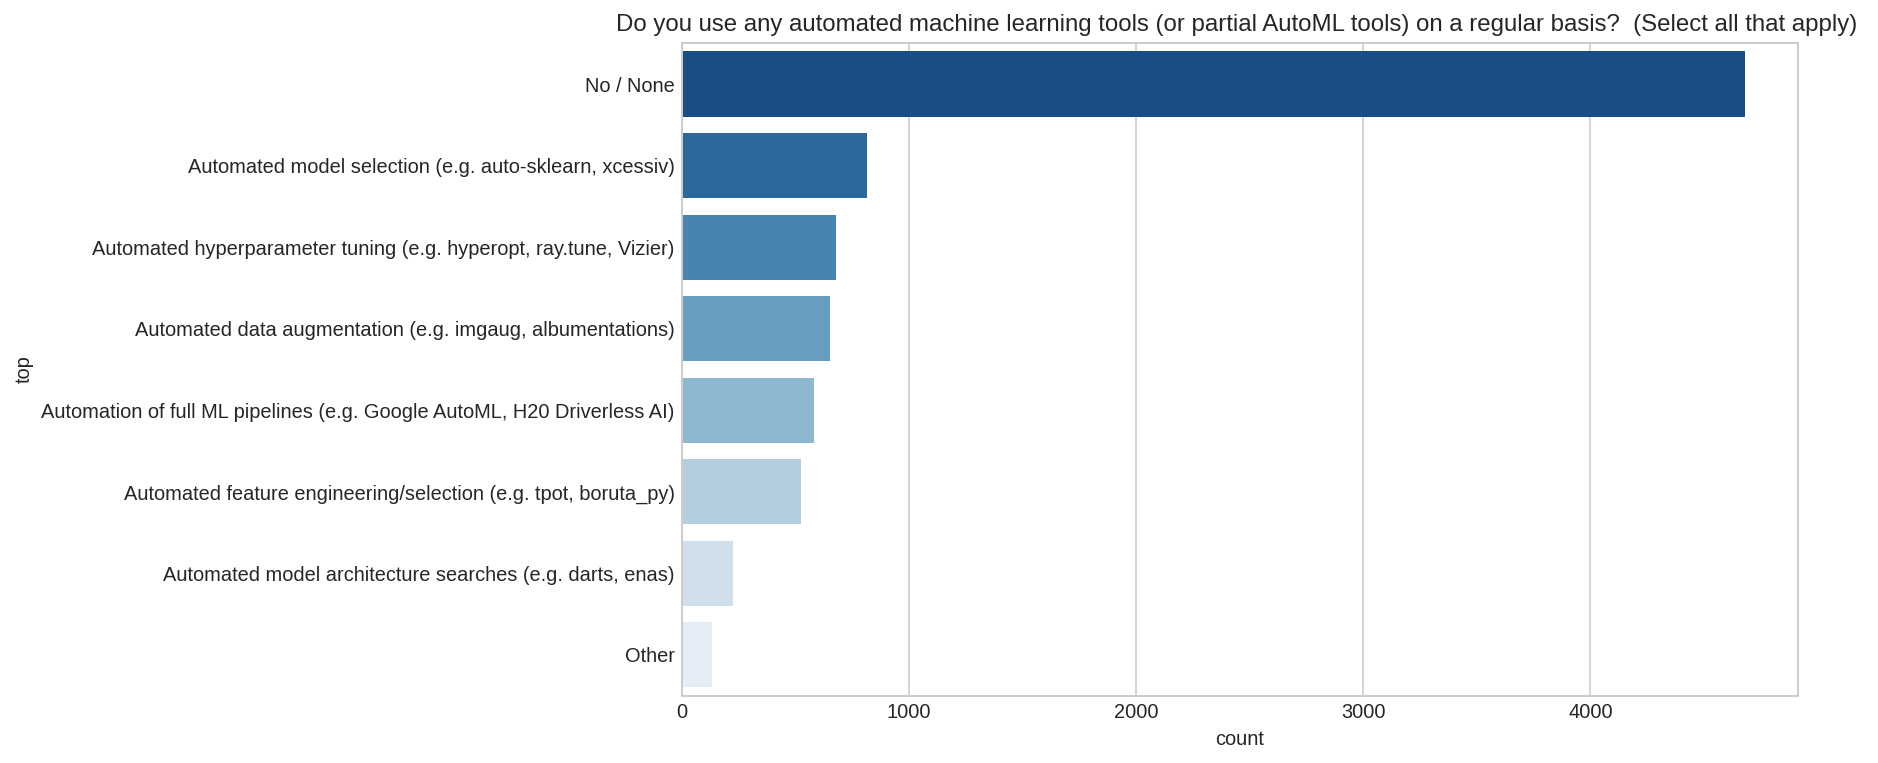

In [28]:
# AutoML 같은 제품군을 어디에 주로 사용하고 있는지
show_plot_by_qno("Q33_A")

# Q33_B Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

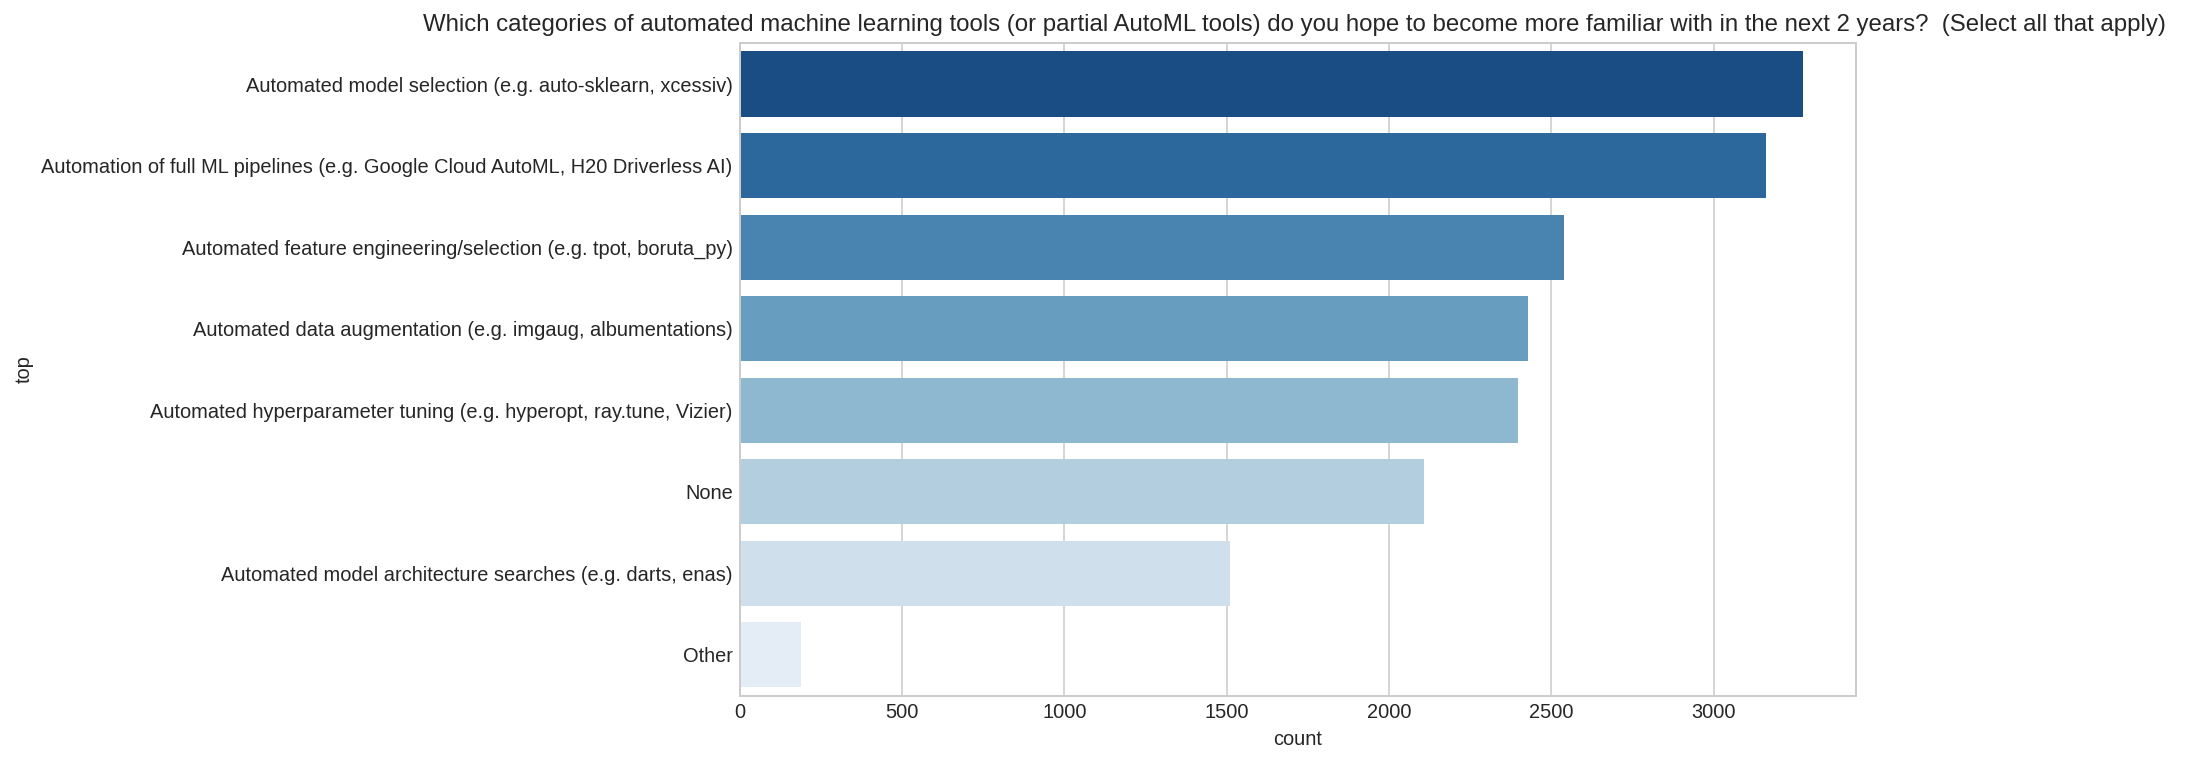

In [29]:
# 앞으로는 어떻게 할 건지
show_plot_by_qno("Q33_B")

# Q34_A Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)

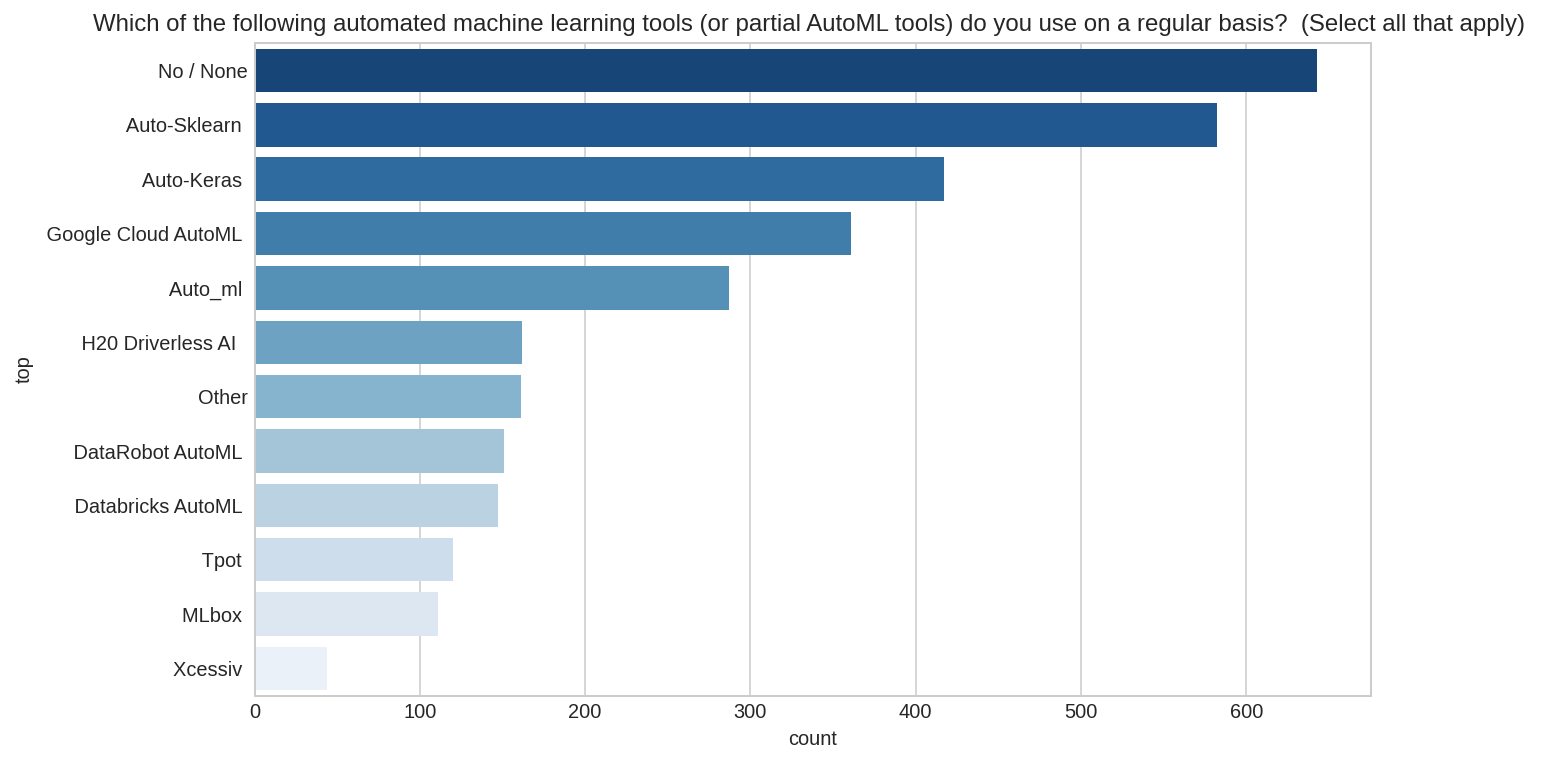

In [30]:
# AutoML에서 주로 사용하는게 어떤 건지
show_plot_by_qno("Q34_A")

# Q34_B Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

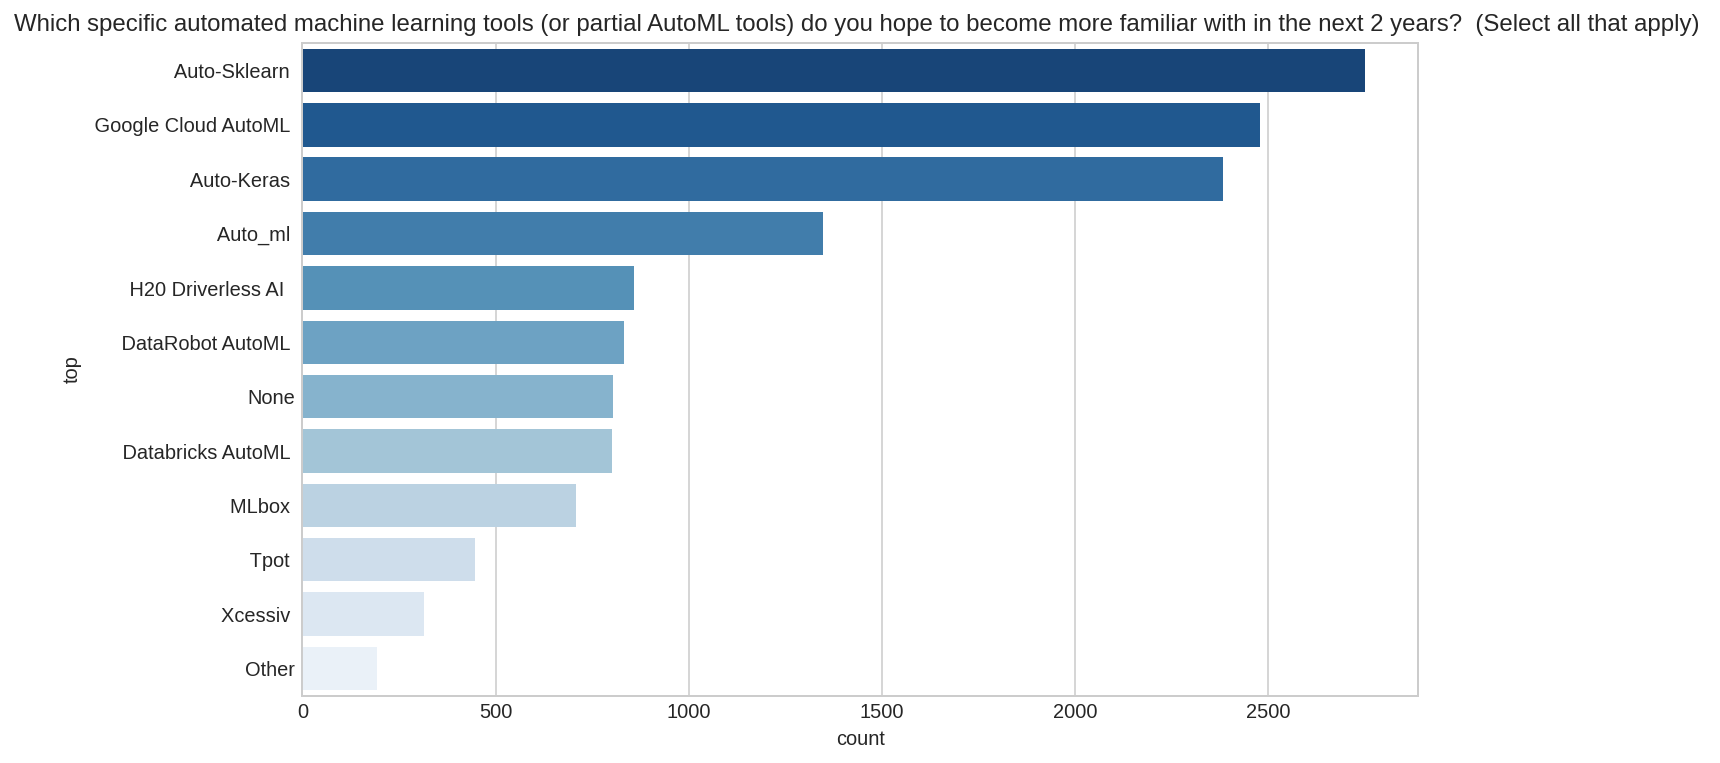

In [31]:
# 이후에는 어떻게 할건지
show_plot_by_qno("Q34_B")

# Q35_A Do you use any tools to help manage machine learning experiments? (Select all that apply)

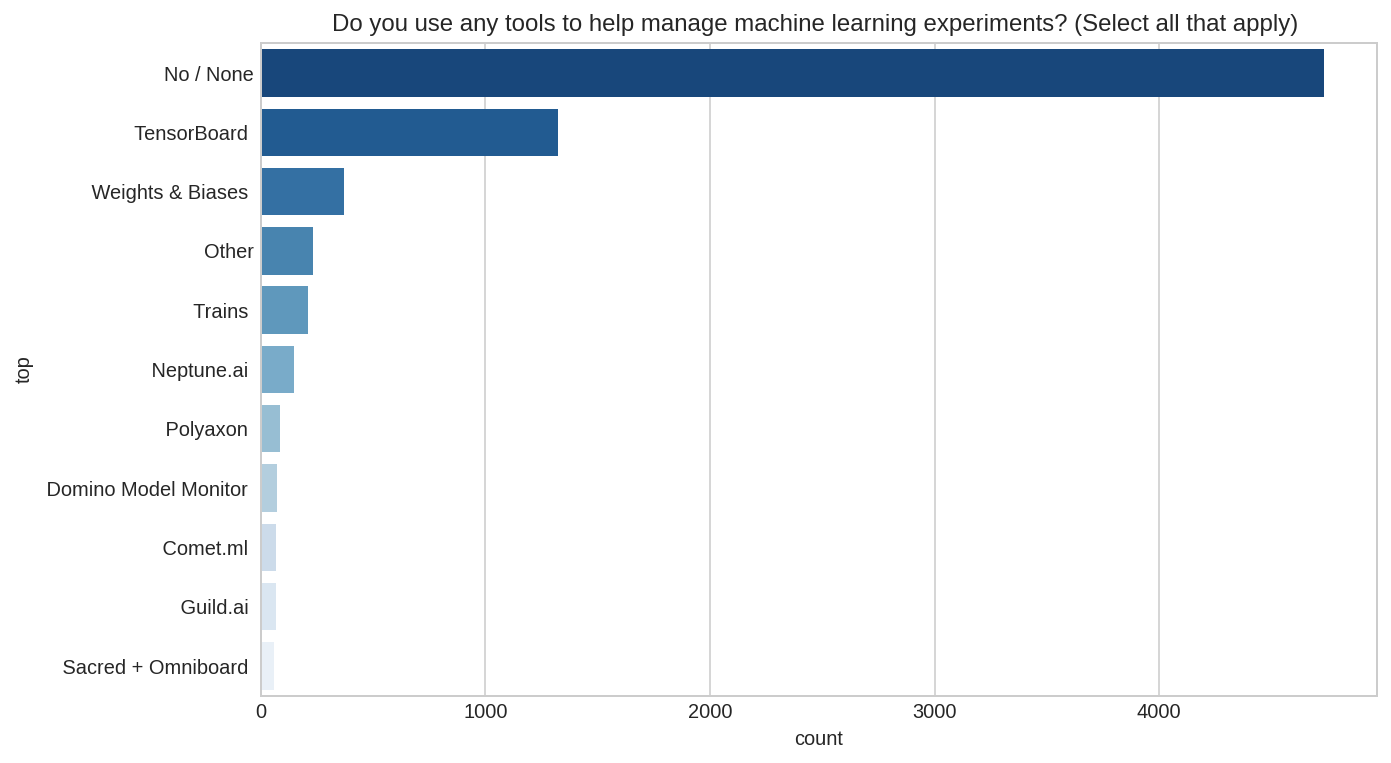

In [32]:
# 머신러닝 제품군을 운영하면서 어떤 툴을 통해 도움받고 있는지
show_plot_by_qno("Q35_A")

# Q35_B In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)

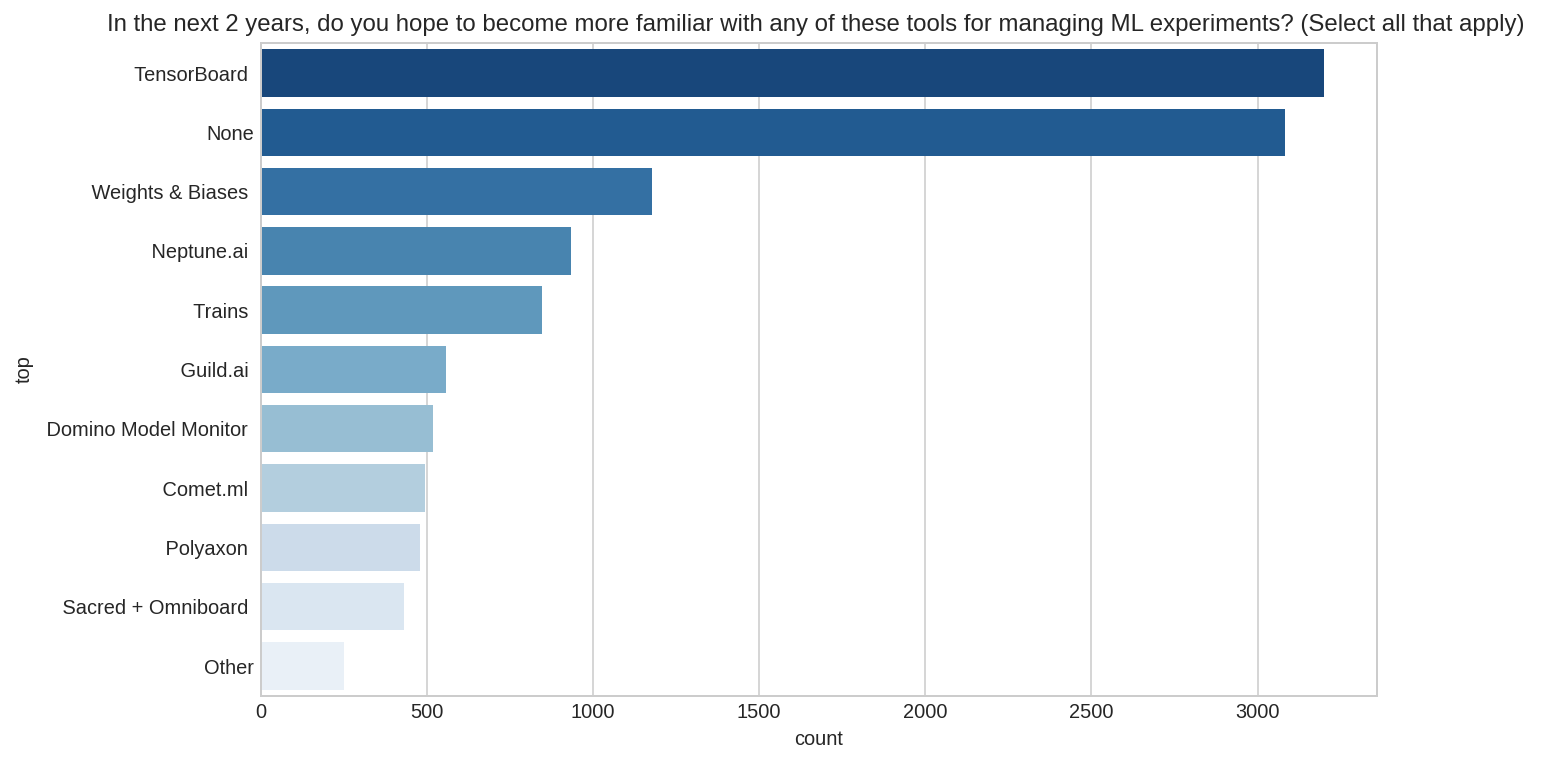

In [33]:
# 이후에 어떻게 할건지
show_plot_by_qno("Q35_B")

# Q36 Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)

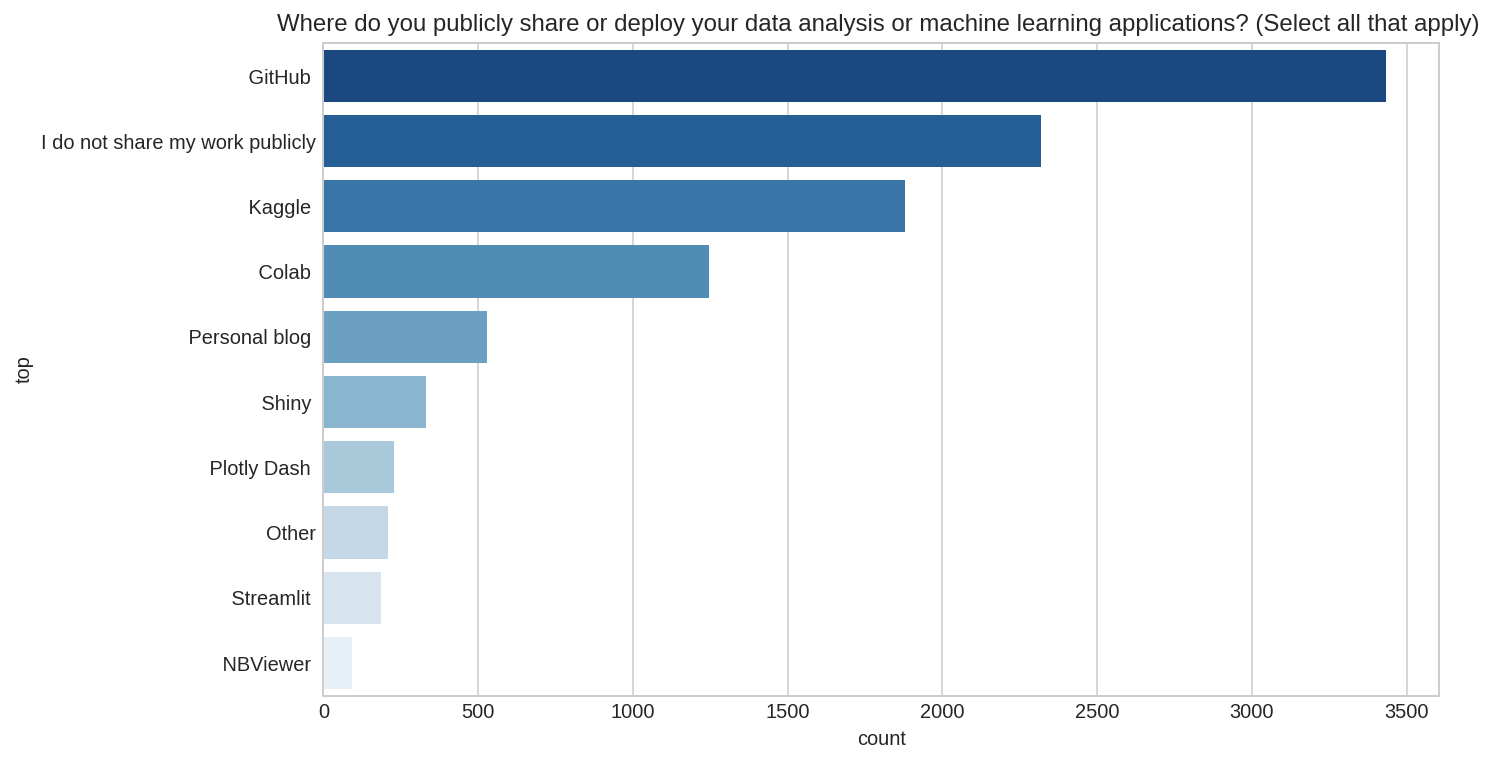

In [34]:
# 머신러닝 한 걸 주로 어디에 공유하는지
show_plot_by_qno("Q36")

# Q37 On which platforms have you begun or completed data science courses? (Select all that apply)

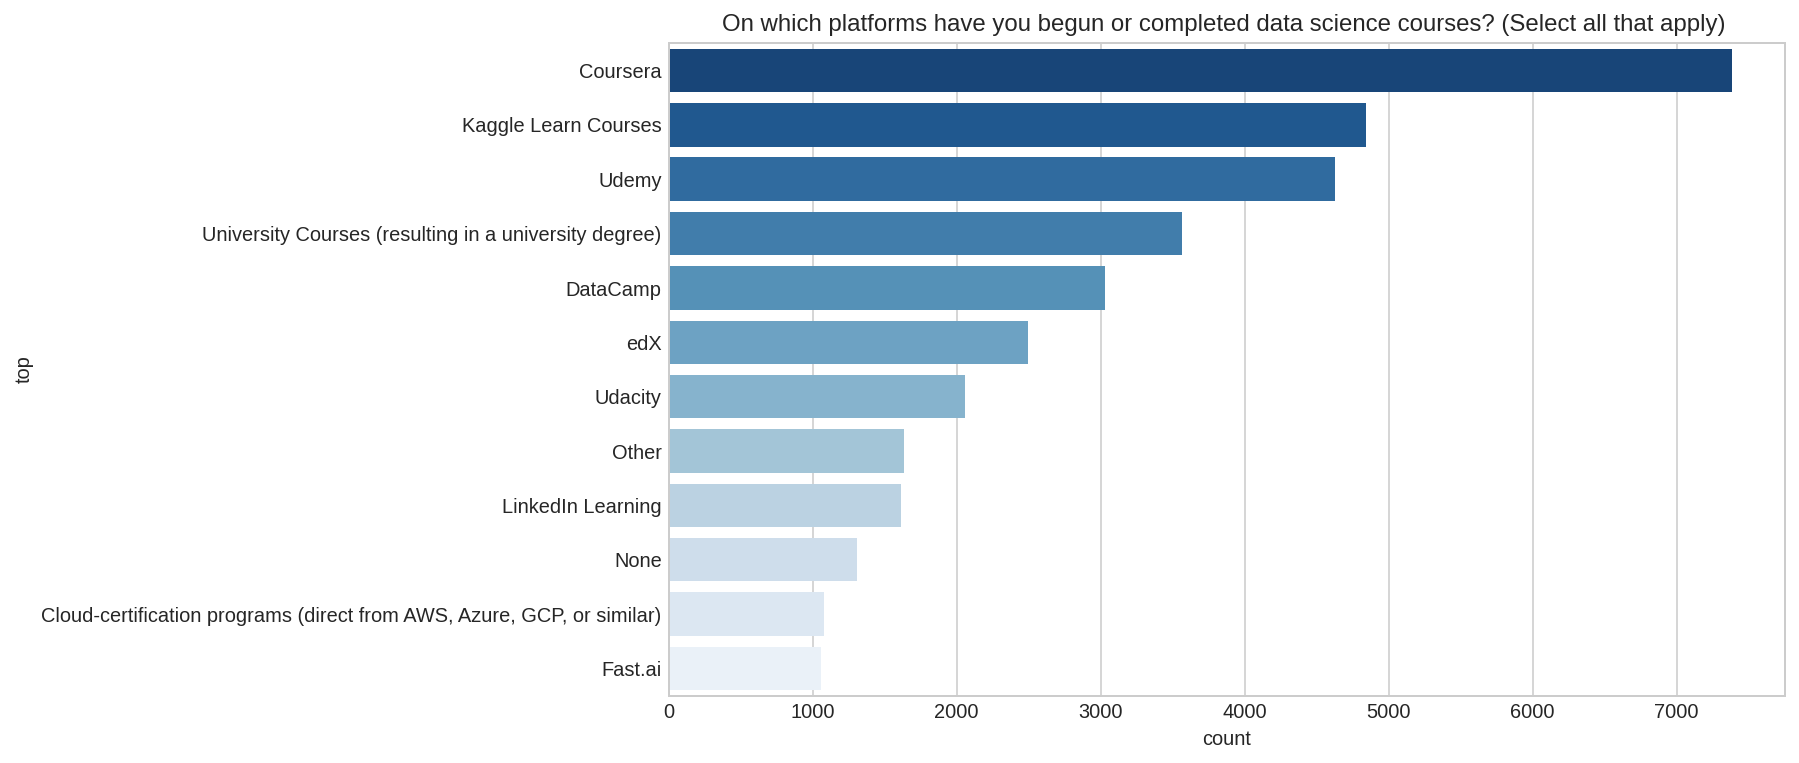

In [35]:
# 어디에서 데이터 사이언스 코스를 시작하거나 완주했는지
show_plot_by_qno("Q37")

# Q38 What is the primary tool that you use at work or school to analyze data? (Include text response)

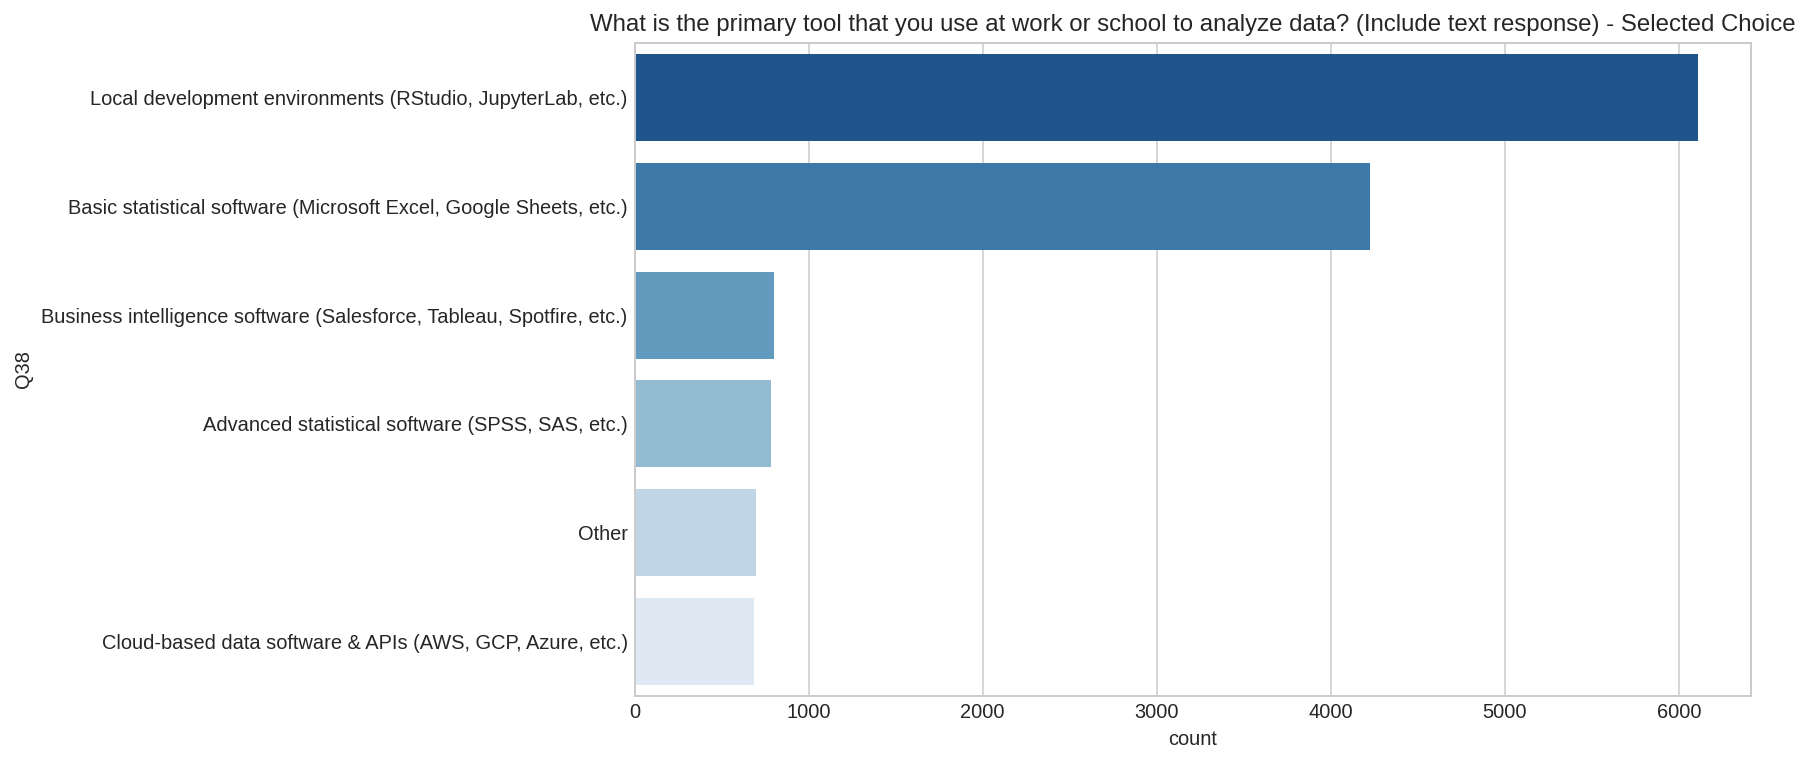

In [37]:
# 학교나 업무할 때 어떤 툴을 가장 우선적으로 사용하는지
show_plot_by_qno("Q38")

# Q39 Who/what are your favorite media sources that report on data science topics? (Select all that apply)

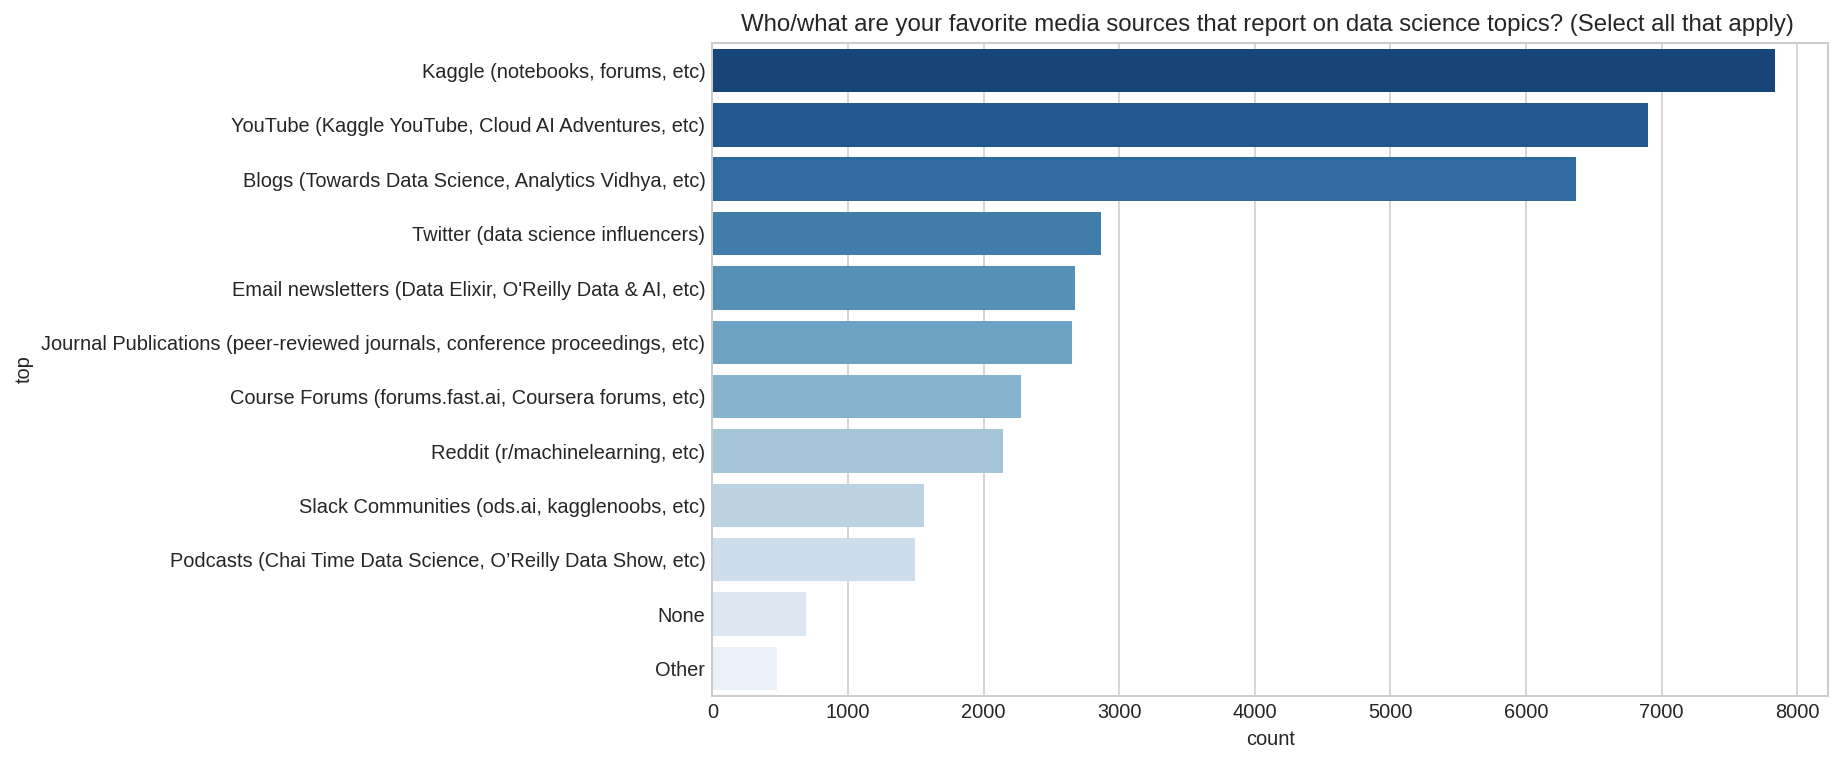

In [38]:
# 가장 선호하는 미디어가 어디인지
show_plot_by_qno("Q39")

In [39]:
'''
캐글 노트북을 내 컴퓨터로 가져와 실습하고 싶다면?

Kaggle에서 Copy and Edit 버튼이 있는데 
이 버튼을 눌러서 Copy해온 뒤에 Edit 눌러주기
왼쪽 상단 보면 File 가 있고, 여기에서 다운로드를 받을 수 있다.
주피터 노트북 파일(.ipynb)로 받아진다. 
해당 파일 복사 내가 옮기고자 하는 폴더에서 붙여넣기

또는 구글 colab에서 하고 싶은 경우
똑같이 다운로드 받은 파일을 
colab 을 사용하려는 폴더로 복사붙여넣기 해주면 된다.
'''

'\n캐글 노트북을 내 컴퓨터로 가져와 실습하고 싶다면?\n\nKaggle에서 Copy and Edit 버튼이 있는데 \n이 버튼을 눌러서 Copy해온 뒤에 Edit 눌러주기\n왼쪽 상단 보면 File 가 있고, 여기에서 다운로드를 받을 수 있다.\n주피터 노트북 파일(.ipynb)로 받아진다. \n해당 파일 복사 내가 옮기고자 하는 폴더에서 붙여넣기\n\n또는 구글 colab에서 하고 싶은 경우\n똑같이 다운로드 받은 파일을 \ncolab 을 사용하려는 폴더로 복사붙여넣기 해주면 된다.\n'